In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#path for Spectogram images
!unzip /gdrive/MyDrive/dataset/finalds.zip > /dev/null

In [ ]:
#path for Audio
!unzip /gdrive/MyDrive/dataset/ADReSS-IS2020-data.zip > /dev/null

In [ ]:
import os
# from pydub import AudioSegment
from scipy.io import wavfile
from tempfile import mktemp
from IPython.display import Audio

import librosa
import librosa.display

import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as mpimg
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from PIL import Image 
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.layers import GlobalAveragePooling2D, Lambda
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image

K.clear_session()

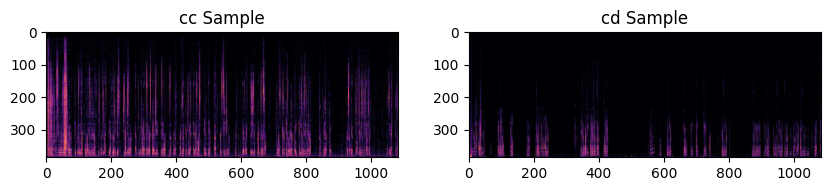

In [ ]:
# Take a peek at image data 
sample_cc = '/gdrive/MyDrive/img_dataset/test/cc/S174.jpg' 
sample_cc = plt.imread(sample_cc)
sample_cd = '/gdrive/MyDrive/img_dataset/test/cd/S192.jpg'
sample_cd = plt.imread(sample_cd)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,2)) 
ax1.imshow(sample_cc)
ax1.set_title('cc Sample')
ax2.imshow(sample_cd)
ax2.set_title('cd Sample')
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = "/content/finalds/train"
val_data = "/content/finalds/test"

In [ ]:
train_generator = train_datagen.flow_from_directory(train_data,
                                                    target_size=(250, 250),
                                                    batch_size=10,
                                                    color_mode='rgb',
                                                    shuffle=True,
                                                    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(val_data,
                                                        target_size=(250, 250),
                                                        batch_size=10,
                                                        color_mode='rgb',
                                                        shuffle=True,
                                                        class_mode='categorical')

Found 120 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [ ]:
base_model3 = Xception(input_shape=(250, 250, 3), weights='imagenet', include_top=False)
for layer in base_model3.layers[:100]:
    layer.trainable = False
x = base_model3.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model3 = Model(inputs=base_model3.inputs, outputs=predictions)
model3.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 124, 124, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 124, 124, 32  128        ['block1_conv1[0][0]']           
 ation)                      

In [ ]:
model3.compile(optimizer='adam',
              metrics=['accuracy'],
              loss='categorical_crossentropy')

In [ ]:
# Checkpoint to save best model per epoch
model_filepath = "/gdrive/MyDrive/AD_Classification/model3//model3-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint3 = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
history3 = model3.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator,
                    steps_per_epoch=len(train_generator),
                    callbacks=[checkpoint3],
                    validation_steps=len(validation_generator)
                  ) 

Epoch 1/20
92/92 [==============================] - ETA: 0s - loss: 0.6501 - accuracy: 0.5939
Epoch 1: val_accuracy improved from -inf to 0.53125, saving model to /gdrive/MyDrive/AD_Classification/model3/model3-01-0.5312.hdf5
92/92 [==============================] - 38s 168ms/step - loss: 0.6501 - accuracy: 0.5939 - val_loss: 2.3048 - val_accuracy: 0.5312
Epoch 2/20
92/92 [==============================] - ETA: 0s - loss: 0.3879 - accuracy: 0.8417
Epoch 2: val_accuracy improved from 0.53125 to 0.65625, saving model to /gdrive/MyDrive/AD_Classification/model3/model3-02-0.6562.hdf5
92/92 [==============================] - 13s 136ms/step - loss: 0.3879 - accuracy: 0.8417 - val_loss: 1.4698 - val_accuracy: 0.6562
Epoch 3/20
92/92 [==============================] - ETA: 0s - loss: 0.1520 - accuracy: 0.9498
Epoch 3: val_accuracy improved from 0.65625 to 0.87500, saving model to /gdrive/MyDrive/AD_Classification/model3/model3-03-0.8750.hdf5
92/92 [==============================] - 15s 158ms/s

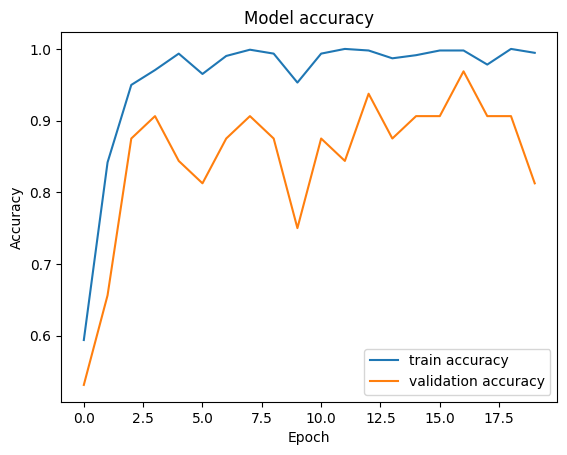

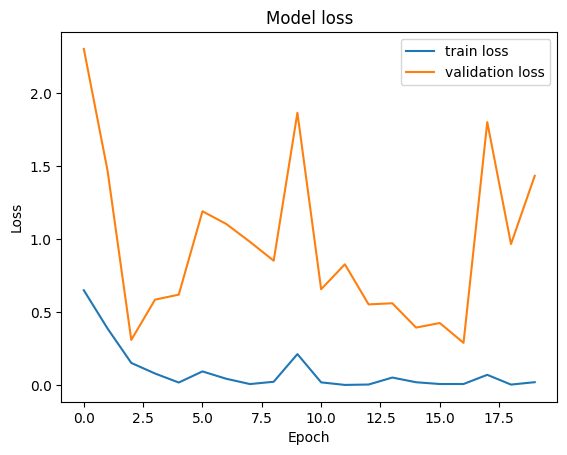

In [ ]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_Xception')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_Xception')
    plt.show()
    
plot_accuracy(history3)
plot_loss(history3)

In [4]:
K.clear_session()
path_to_model='/gdrive/MyDrive/AD_Classification/model3/model3-17-0.9688.hdf5'
print("Loading the model..")
model3 = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


In [6]:
validation_data_dir = '/content/finalds/test'

validation_datagen = image.ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(250,250),
    batch_size=8,
    class_mode='categorical')

scores = model3.evaluate_generator(validation_generator)
print("Test Accuracy: {:.3f}".format(scores[1]*100))

Found 32 images belonging to 2 classes.
Test Accuracy: 96.875


In [ ]:
import os
import librosa
import librosa.display


# Define the categories
category = {
    0: 'cc',
    1: 'cd'
}



def create_spectogram(audio_file_name, source_path, save_path):
    x, sr = librosa.load(source_path + audio_file_name)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, y_axis='hz')
    plt.ylabel('')
    plt.axis('off')
    file_name = audio_file_name.replace('.wav', '')
    plt.savefig(save_path + file_name + '.jpg', bbox_inches='tight', pad_inches=0)
    plt.close()

def predict_audio_category(audio_file_path):
    # Create spectrogram of the audio
    save_path = os.path.dirname(audio_file_path) + '/'
    create_spectogram(os.path.basename(audio_file_path), os.path.dirname(audio_file_path) + '/', save_path)
    
    # Load and preprocess the spectrogram image
    img = image.load_img(save_path + os.path.basename(audio_file_path).replace('.wav', '.jpg'), target_size=(250, 250))
    img_array = image.img_to_array(img)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    # Make prediction using the trained model
    prediction = model3.predict(img_processed)
    index = np.argmax(prediction)
    
    # Get the predicted category
    predicted_category = category.get(index)
    
    # Show the spectrogram image
    img_spectrogram = image.load_img(save_path + os.path.basename(audio_file_path).replace('.wav', '.jpg'))
    plt.imshow(img_spectrogram)
    plt.title("Prediction - {}".format(predicted_category))
    plt.axis('off')
    plt.show()
    
    return predicted_category


1/1 [==============================] - 0s 29ms/step


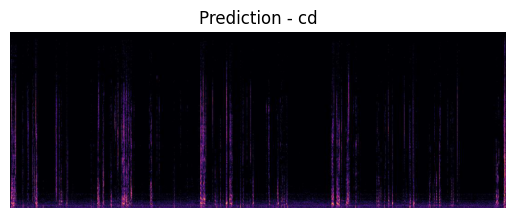

Predicted category: cd


In [ ]:
predicted_category = predict_audio_category('/content/ADReSS-IS2020-data/test/cd/S182.wav')
print('Predicted category:', predicted_category)


1/1 [==============================] - 0s 41ms/step


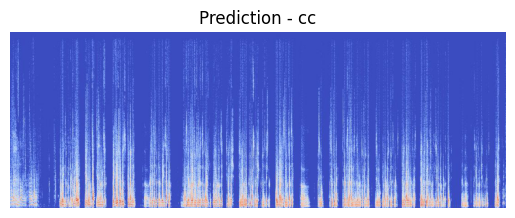

Predicted category: cc


In [ ]:
predicted_category = predict_audio_category('/content/ADReSS-IS2020-data/test/cc/S184.wav')
print('Predicted category:', predicted_category)

In [ ]:
def labels_confusion_matrix(test_folder):
    
    folder_path=test_folder
    
    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i
    
    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):
        
        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        true=mapping[true]
        
        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(250,250))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0) 
            img_processed /= 255.
            prediction = model3.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)
            
    return (real,predicted)

def print_confusion_matrix(real,predicted):
    total_output_labels = 2
    cmap="OrRd"
    cm_plot_labels = [i for i in range(2)]
    
  
    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (10,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap) # font size

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

In [ ]:
y_true,y_pred=labels_confusion_matrix('/content/finalds/test')
print(classification_report(y_true, y_pred))

1/1 [==============================] - 0s 26ms/step
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.94      1.00      0.97        16

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



1/1 [==============================] - 0s 25ms/step


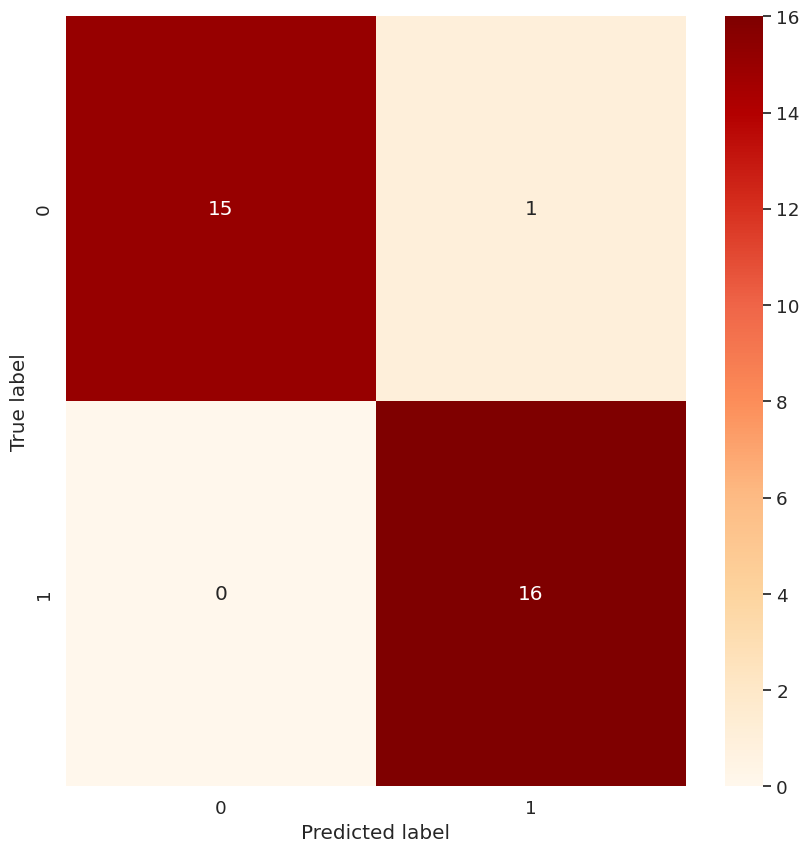

In [ ]:
y_true,y_pred=labels_confusion_matrix('/content/finalds/test')
print_confusion_matrix(y_true,y_pred)